### This is a simple notebook to build and visualize decision trees.

It accompanies Chapter 2 of the book.

Copyright: Viviana Acquaviva (2023)

Additions and Modifications by Julieta Gruszko (2025)

License: [BSD-3-clause](https://opensource.org/license/bsd-3-clause/)
    
Some visualization-inspiration credits:

https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

#### List the names your group members below:


>names x3

In [1]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd #new!

from sklearn.tree import DecisionTreeClassifier #how methods are imported 

from sklearn import metrics #this will give us access to evaluation metrics

In [2]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

In [3]:
#Here are some packages for visualization purposes only - this cell can be skipped if troublesome

from io import StringIO
from IPython.display import Image  
import pydotplus

from sklearn.tree import export_graphviz #you can just use this if the other lines give trouble

### We use a selection of data from [the Planet Habitability Lab](https://phl.upr.edu/projects/habitable-exoplanets-catalog).

### We begin by reading in the data set using pandas.

In [6]:
LearningSet = pd.read_csv('../Desktop/HPLearningSet.csv')

In [7]:
LearningSet

,Unnamed: 0,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,0,Kepler-736 b,0.86,3.601472,0.043718,0
1,1,Kepler-636 b,0.85,16.080661,0.118082,0
2,2,Kepler-887 c,1.19,7.638460,0.080420,0
3,3,Kepler-442 b,0.61,112.305300,0.409327,1
4,4,Kepler-772 b,0.98,12.992073,0.107408,0
5,5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,6,K2-116 b,0.69,4.655411,0.048086,0
7,7,GJ 1061 c,0.12,6.689000,0.035000,1
8,8,HD 68402 b,1.12,1103.000000,2.180981,0
9,9,Kepler-1544 b,0.81,168.811170,0.557107,1


We want to drop the first column of the file, which is just an index.

In [8]:
LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) 

The structure we created is called a data frame.

It's nice because we can refer to columns with their names as well as indices, and it looks neat. 

In [9]:
LearningSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


In [10]:
LearningSet[['P_NAME','S_MASS']] #One convenient way to access columns

,P_NAME,S_MASS
0,Kepler-736 b,0.86
1,Kepler-636 b,0.85
2,Kepler-887 c,1.19
3,Kepler-442 b,0.61
4,Kepler-772 b,0.98
5,Teegarden's Star b,0.09
6,K2-116 b,0.69
7,GJ 1061 c,0.12
8,HD 68402 b,1.12
9,Kepler-1544 b,0.81


In [11]:
LearningSet.P_NAME #another one!

0           Kepler-736 b
1           Kepler-636 b
2           Kepler-887 c
3           Kepler-442 b
4           Kepler-772 b
5     Teegarden's Star b
6               K2-116 b
7              GJ 1061 c
8             HD 68402 b
9          Kepler-1544 b
10          Kepler-296 e
11          Kepler-705 b
12          Kepler-445 c
13           HD 104067 b
14             GJ 4276 b
15          Kepler-296 f
16           Kepler-63 b
17             GJ 3293 d
Name: P_NAME, dtype: object

### Let's pick the same train/test set we had in the exercise.

In the notation below, we're using pandas' "iloc", which allows you to select rows or columns by index, regardless of the name of the column. The syntax of iloc is: df.iloc[row_indexer, column_indexer], where each indexer can be a single integer, a list of integers, a slice, or a boolean array. Here, we're using it to select the first 13 rows for the training set, and everything after that for hte test set. We're selecting all of the colums.

We'll use this approach a lot, so make sure you're following how it works! Try making some difference selections to get comfortable with it.

We can now creat a train and a test set. Normally this would happen at random, using the function train_test_split, but here we are following along with the book.

In [13]:
TrainSet =  LearningSet.iloc[:13, :]  

TestSet = LearningSet.iloc[13:] # This syntax also works, if you don't give column indices it will select all of them

In [16]:
DummySelection = LearningSet.iloc[:5, :] #try some different row and column selections to get comfortable with "iloc". I suggest trying something other than slices
DummySelection

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0


In [17]:
TrainSet #Take a look at the data frame

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


In [18]:
TestSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
13,HD 104067 b,0.62,55.80600,0.260000,0
14,GJ 4276 b,0.41,13.35200,0.087613,0
15,Kepler-296 f,0.50,63.33627,0.268885,1
16,Kepler-63 b,0.98,9.43415,0.088100,0
17,GJ 3293 d,0.42,48.13450,0.195336,1


We also need to split the train and test sets in features and labels.

### Question: Which columns are the features and which are the targets/labels? Which (if any) are neither?

> features: s_mass, p_period, p_distance
>
>targets/labels: p_habitable
>
>neither: p_name

Pandas gives us nice tools to remove columns from the dataframe, in addition to the methods we used above to select a single column. Use these to make data frames for the features and targets of the train and test sets.

You can check the documentation for pandas "drop" method here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html . 

To select a single column, you can use the DataSet.COLUMN_NAME approach used above. 

In [28]:
Xtrain = TrainSet.drop(columns=['P_NAME', 'P_HABITABLE'])

Xtest = TestSet.drop(columns=['P_NAME', 'P_HABITABLE'])

In [29]:
ytrain = TrainSet.P_HABITABLE

ytest = TestSet.P_HABITABLE

First, let's try to figure out our ideal splits by hand, using the features and target of the training set. It'll help us if we do some visualization of the features, so let's try plotting them.

In [30]:
TrainSet[TrainSet.P_HABITABLE == 1] #we can filter our data frame by the value of one of the columns

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
3,Kepler-442 b,0.61,112.305300,0.409327,1
5,Teegarden's Star b,0.09,4.910000,0.025200,1
7,GJ 1061 c,0.12,6.689000,0.035000,1
9,Kepler-1544 b,0.81,168.811170,0.557107,1
10,Kepler-296 e,0.50,34.142110,0.178202,1
11,Kepler-705 b,0.53,56.056054,0.231926,1


In [31]:
len(TrainSet[TrainSet.P_HABITABLE == 1]) #and count the number of entries of our filtered set

6

Let's plot the features. You could plot them in 3D, but it's more difficult to see the values in a 3D plot. Since we're looking for splits that use just 1 feature at a time, looking at a few 2D plots is easier. We'll make 3 2D scatter plots of the training data, and color-code the data points by their labels.

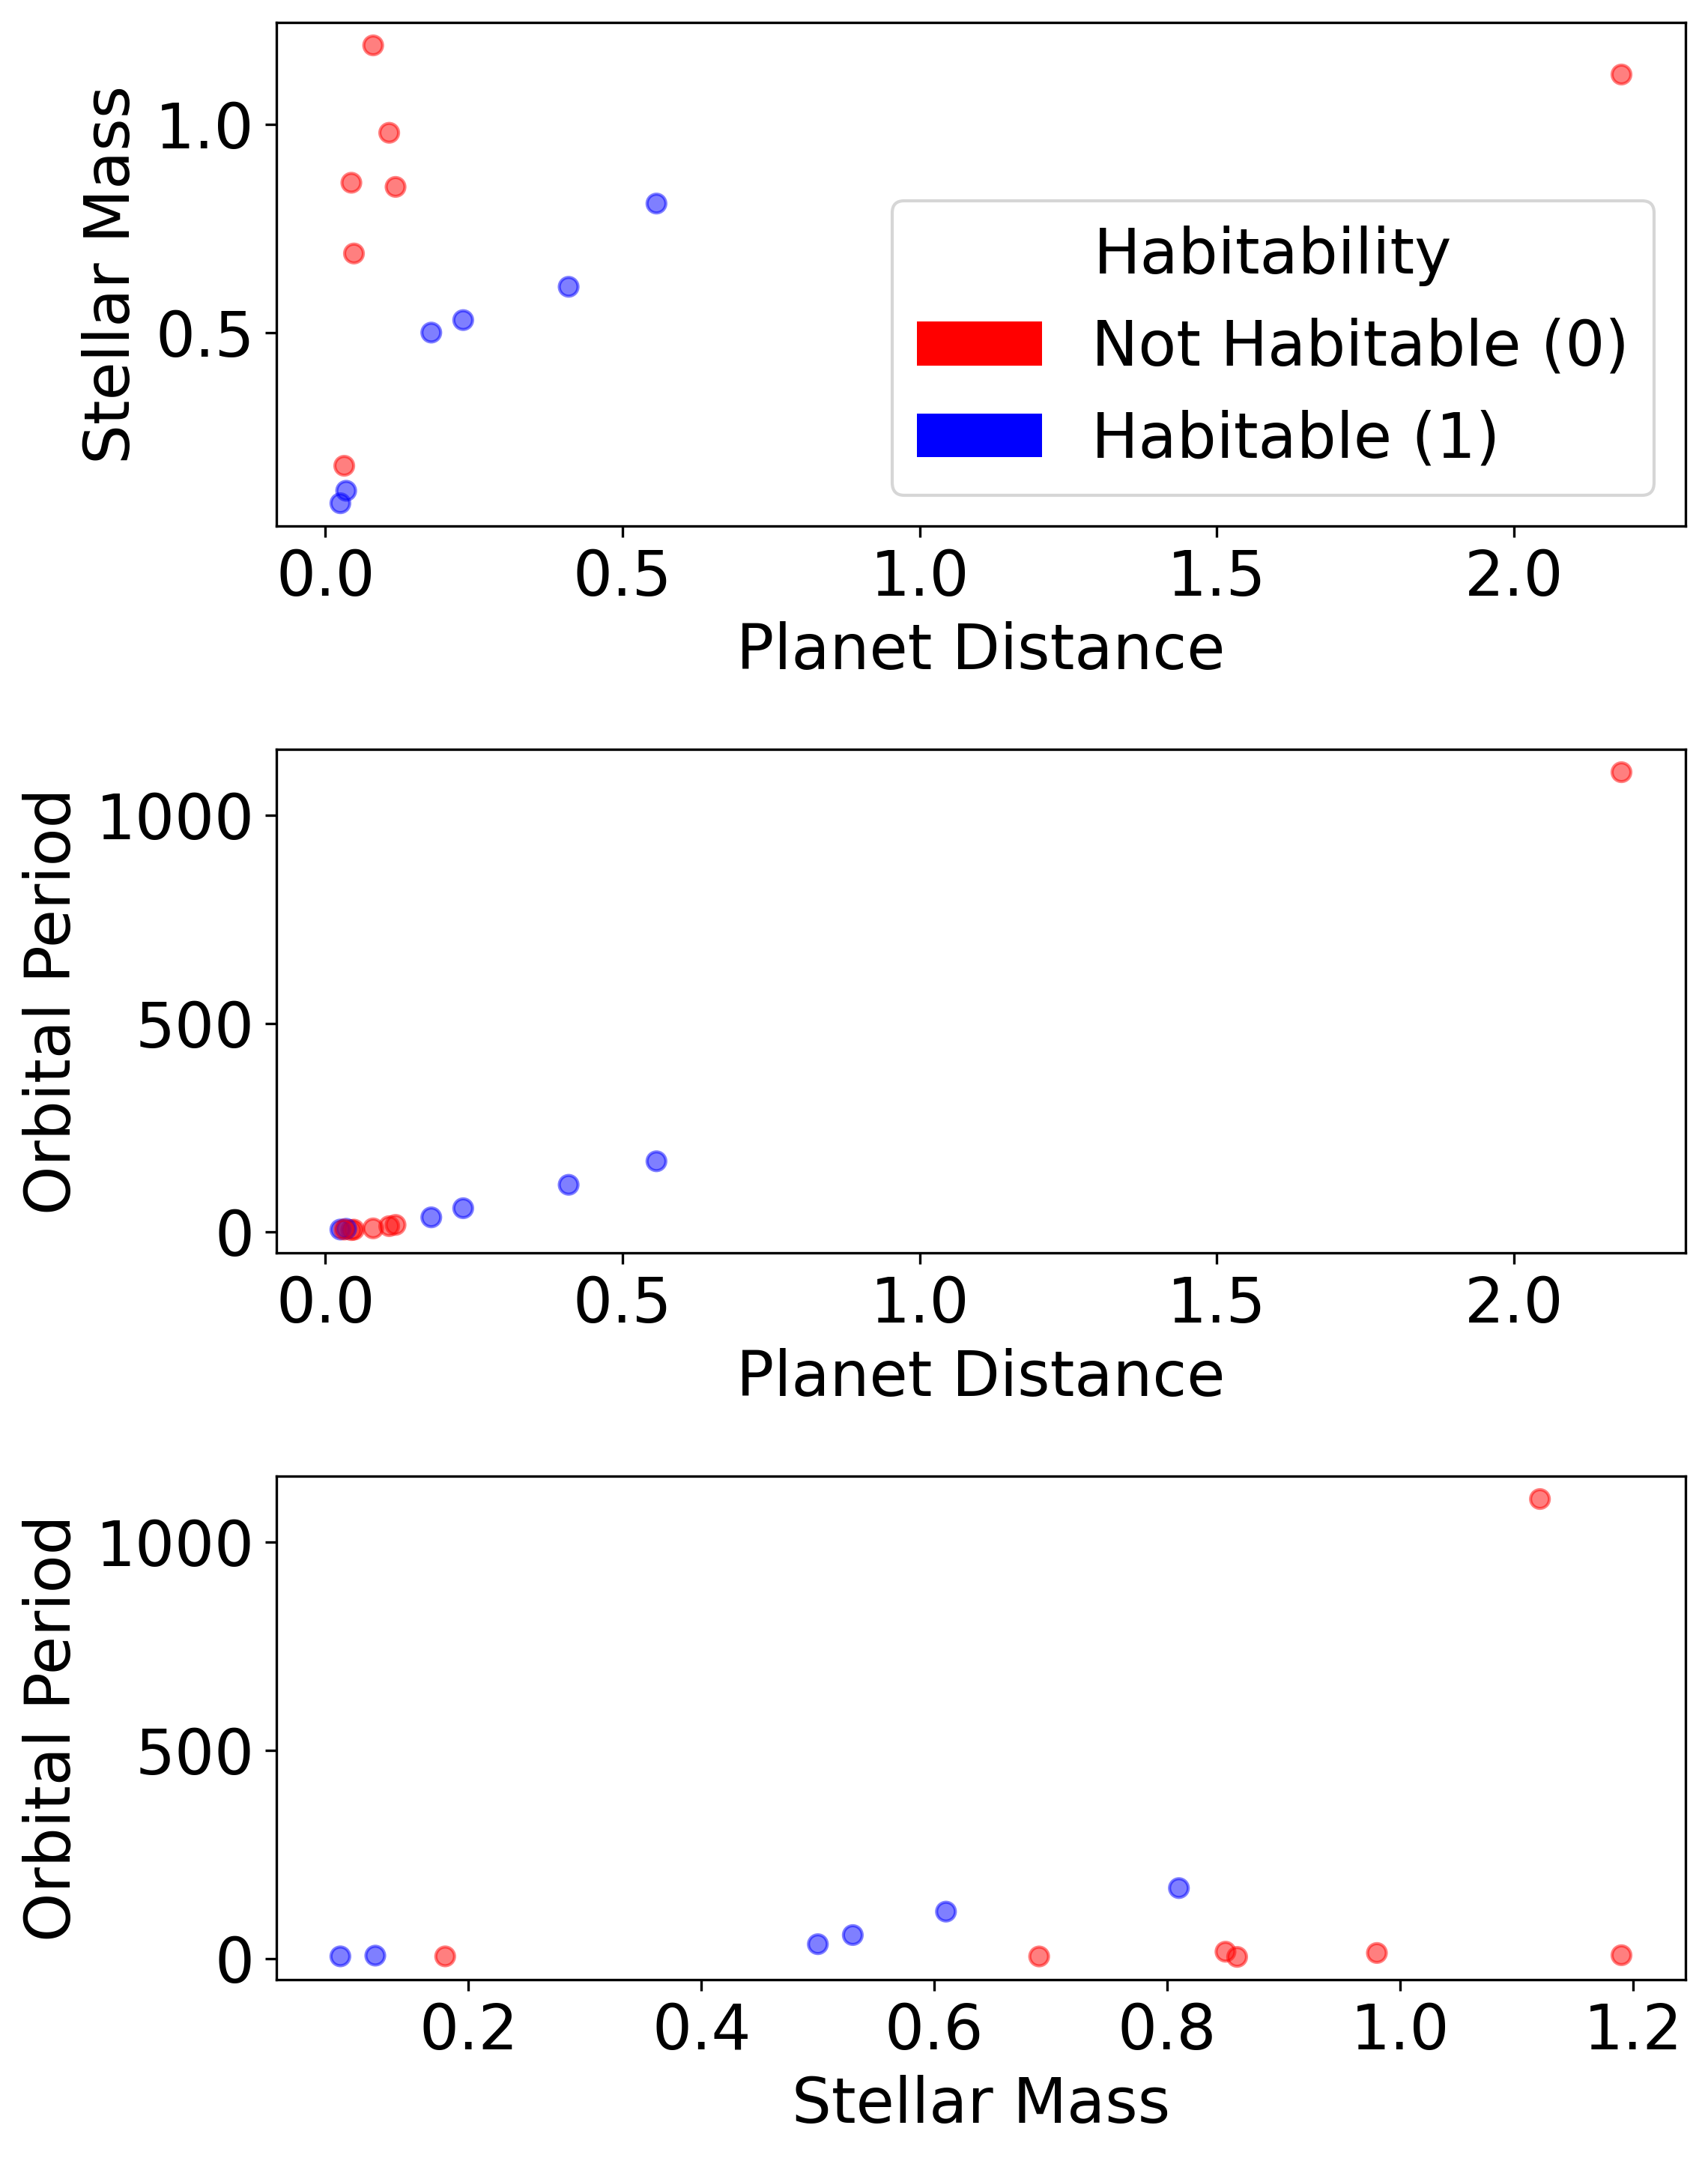

In [55]:
def plotMyData(dataFrame):
    colors = {0:'red', 1:'blue'}
    marker_colors = [colors[hab] for hab in dataFrame['P_HABITABLE']]
    fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(8,10))

    axes[0].scatter(dataFrame['P_DISTANCE'], dataFrame['S_MASS'], c=marker_colors, alpha=0.5)
    axes[0].set_ylabel('Stellar Mass')
    axes[0].set_xlabel('Planet Distance')


    axes[1].scatter(dataFrame['P_DISTANCE'], dataFrame['P_PERIOD'], c=marker_colors, alpha=0.5)
    axes[1].set_ylabel('Orbital Period')
    axes[1].set_xlabel('Planet Distance')

    axes[2].scatter(dataFrame['S_MASS'], dataFrame['P_PERIOD'], c=marker_colors, alpha=0.5)
    axes[2].set_ylabel('Orbital Period')
    axes[2].set_xlabel('Stellar Mass')
    # Create legend handles
    legend_elements = [
        mpatches.Patch(facecolor='red', label='Not Habitable (0)'),
        mpatches.Patch(facecolor='blue', label='Habitable (1)')
    ]

    # Add legend to the figure (can adjust location as needed)
    axes[0].legend(handles=legend_elements, loc='lower right', title='Habitability')

    # ax[1].set_ylim(4.5, 5)
    # ax[1].hlines(y=4.89, xmin=0, xmax=0.5)

    plt.tight_layout()

plotMyData(TrainSet)

By eye, it seems like a good 1st split would be at stellar mass = 0.65 solar masses. Let's calculate the change in Gini impurity for that selection. Recall that Gini impurity is:
$$1 - \Sigma_i f(i)^2$$
where the summation index $i$ indicates a sum over classes and $f(i)$ is the fractional abundance of each class. The "classes" are the two label values we're trying to separate.
After a split, we calculate it by summing over the impurities of two resulting nodes, with each impurity weighted by the fractional abundance of each node with respect to its parent node. 

Define a function that returns the Gini impurity of a data frame.

In [44]:
def gini(df):
    return 1 - sum((len(df[df.P_HABITABLE == 1]) / len(df)) ** 2 for i in df.P_HABITABLE.unique())

In [45]:
#Use your new function to get the Gini impurity of the training set, prior to any splits
gini(TrainSet)

0.57396449704142

Let's try applying a split and calculating the resulting change in Gini impurity. A good option seems to be at Stellar Mass $ = 0.65 M_\odot$

In [47]:
splitval = 0.61 #value we're splitting at
cat = 'S_MASS' #feature we're splitting on

subframe_left = TrainSet.query(f"`{cat}` < {splitval}") #Getting pandas to treat a string variable as a column name for filtering is a little tricky. You need to combine python's string formatting tools with pandas "query" function.
subframe_right = TrainSet.query(f"`{cat}` > {splitval}")

print(f"Gini impurity of node with `{cat}` < {splitval} is {gini(subframe_left):.3f}")
print(f"Gini impurity of node with `{cat}` > {splitval} is {gini(subframe_right):.3f}")

#Decision trees choose splits by comparing the change in gini impurity. Let's calculate the change from our split.
delta_gini = gini(TrainSet) - (len(subframe_left)/len(TrainSet))*(gini(subframe_left))- (len(subframe_right)/len(TrainSet))*(gini(subframe_right))

print(f"Change in Gini impurity from this split is {delta_gini:.3f}")



Gini impurity of node with `S_MASS` < 0.61 is -0.280
Gini impurity of node with `S_MASS` > 0.61 is 0.959
Change in Gini impurity from this split is 0.165


Can you do better? Try modifying the code above to find a better first split, as defined by the Gini impurity.

You should be able to find a better split. The Gini impurity prefers to find splits that maximize the purity of one of the sets, instead of finding splits that "balance" the impurity among more equally-sized groups (up to a point). There are other metrics we can use for the decision tree method that lead to different split choices; you'll try these out on the homework to see how your results change. 

### Give the split you found (feature and value).

>Stellar mass at 0.61

Once we apply this first split, we can see where things stand and decide on a next split. Go back to the cell where you made your plots, and turn it into a function you can keep reusing with new data frames. Then study the nodes resulting from your first split to choose a second split.

Once a group resulting from a split is pure (all elements have the same label), you've reached a ``leaf node" and no further splits will improve the Gini impurity. You can ignore any pure groups in deciding on a next split.

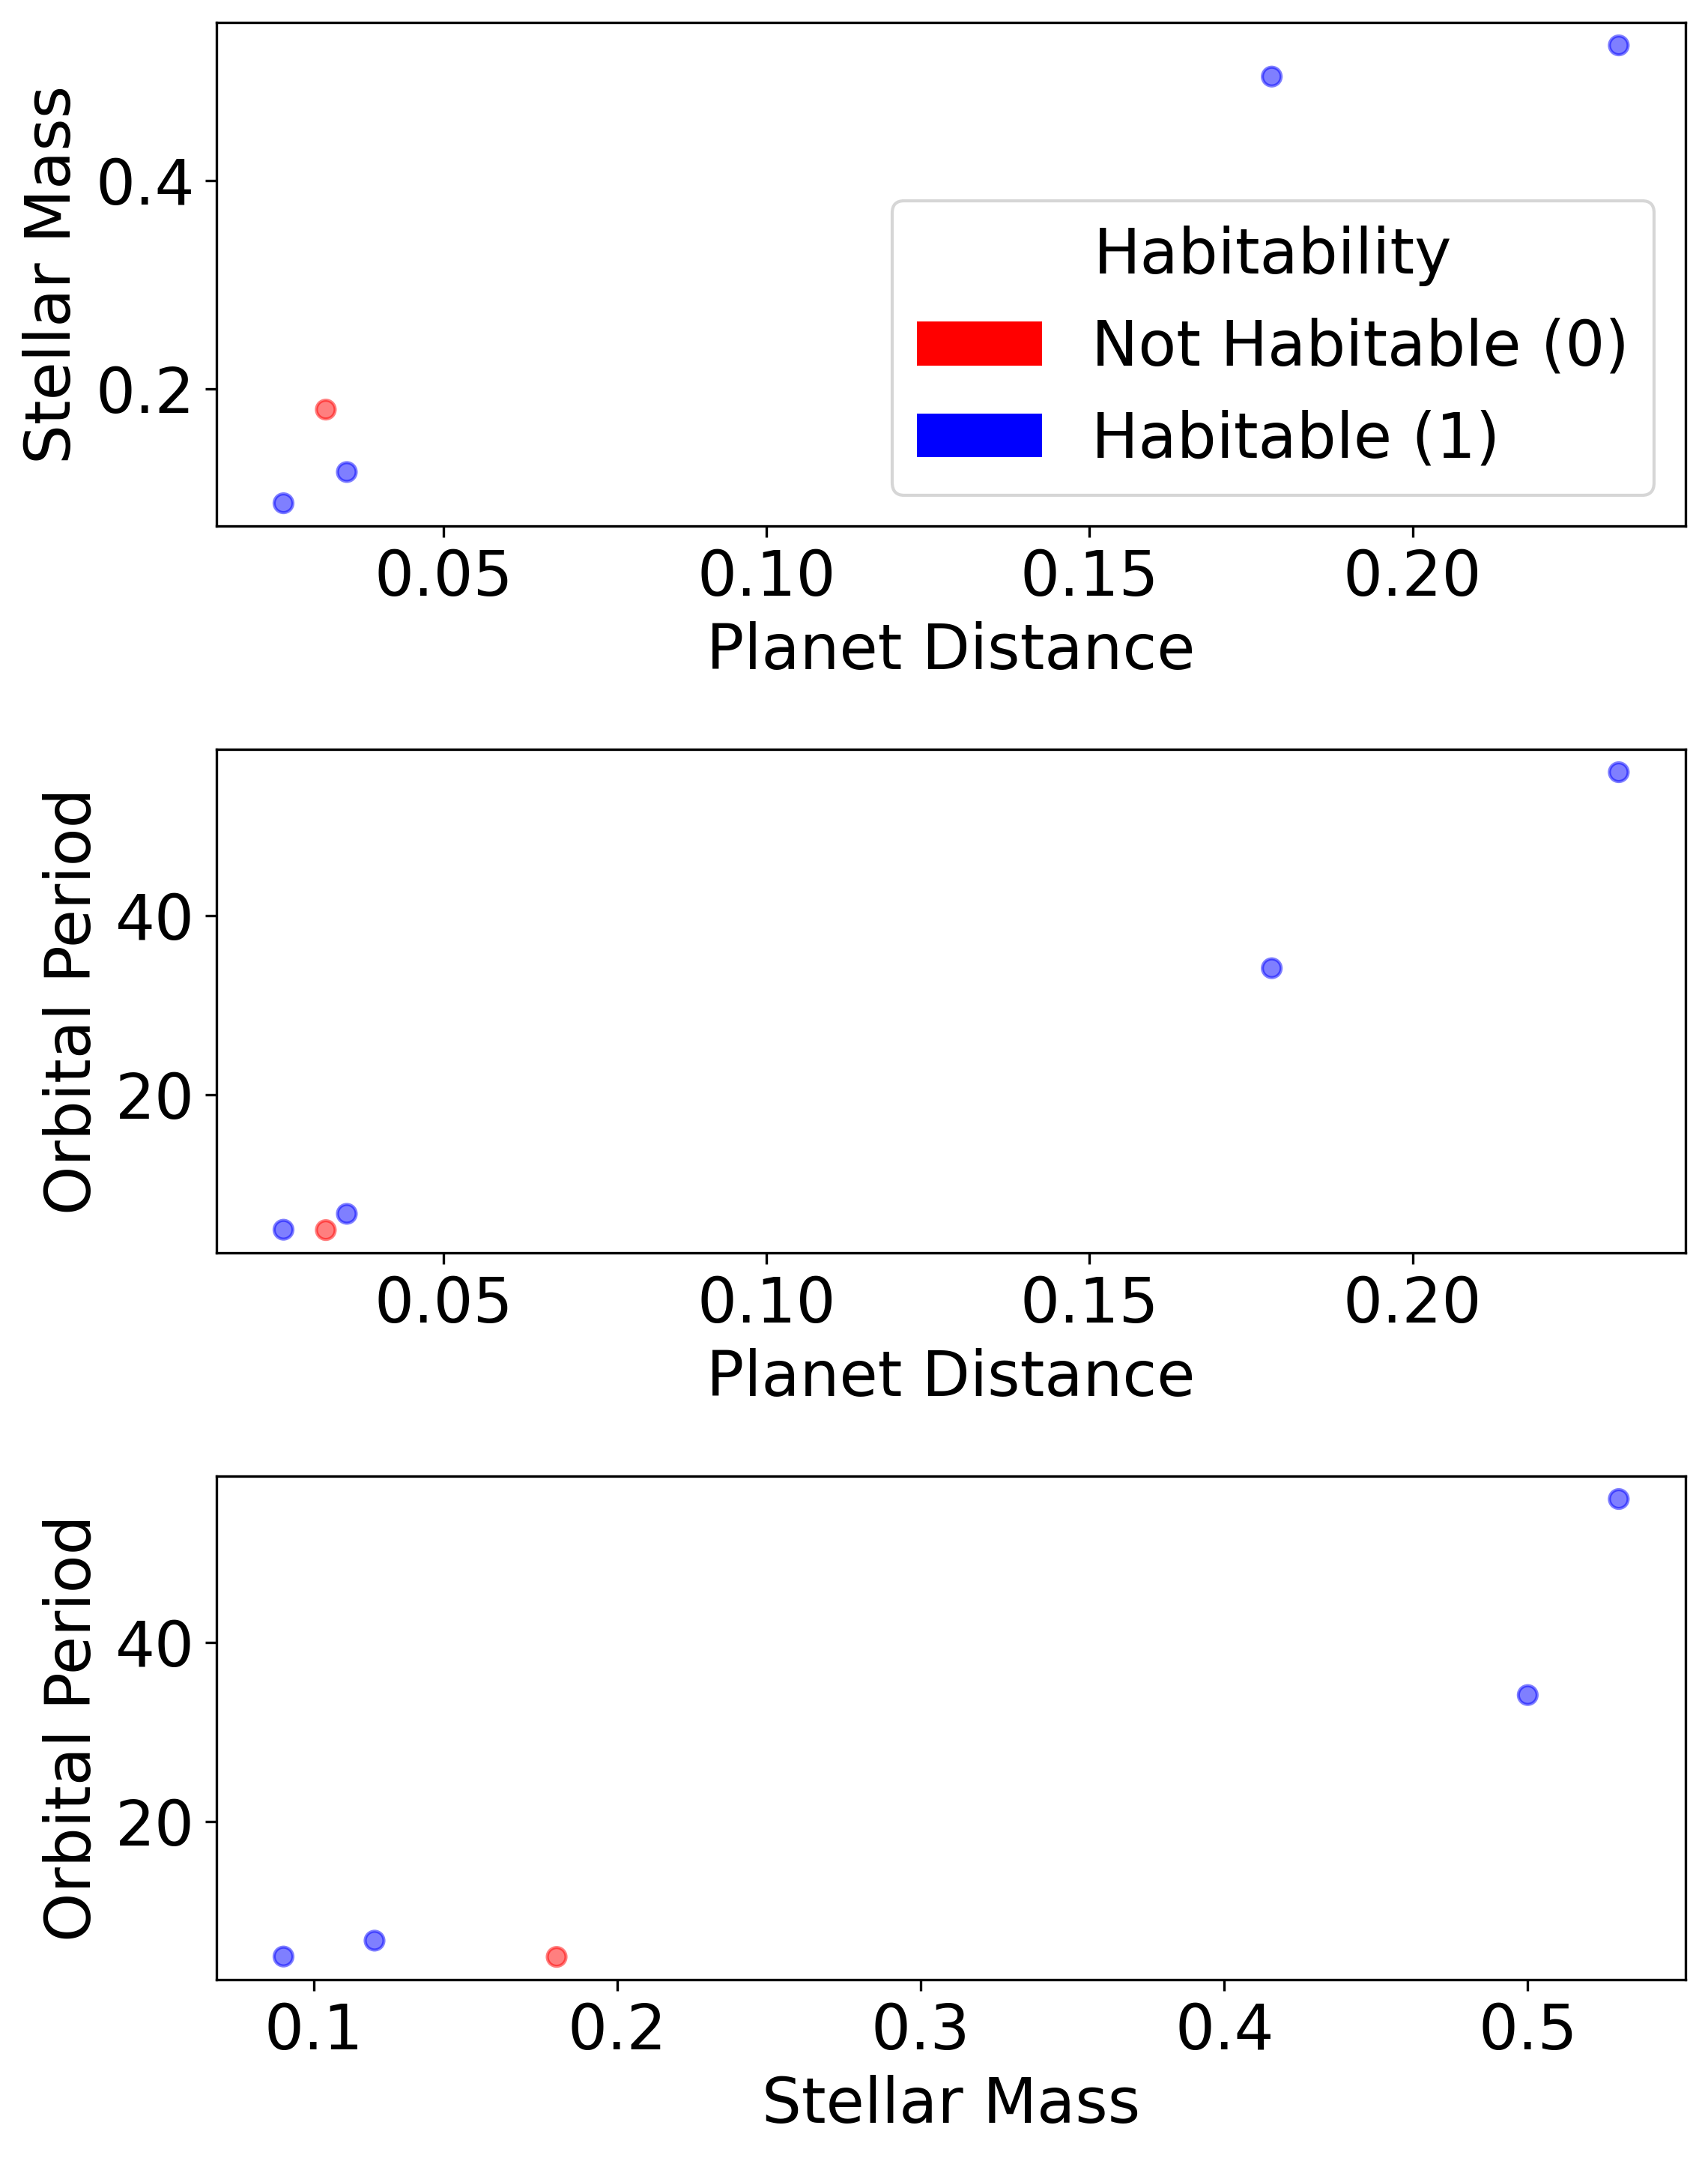

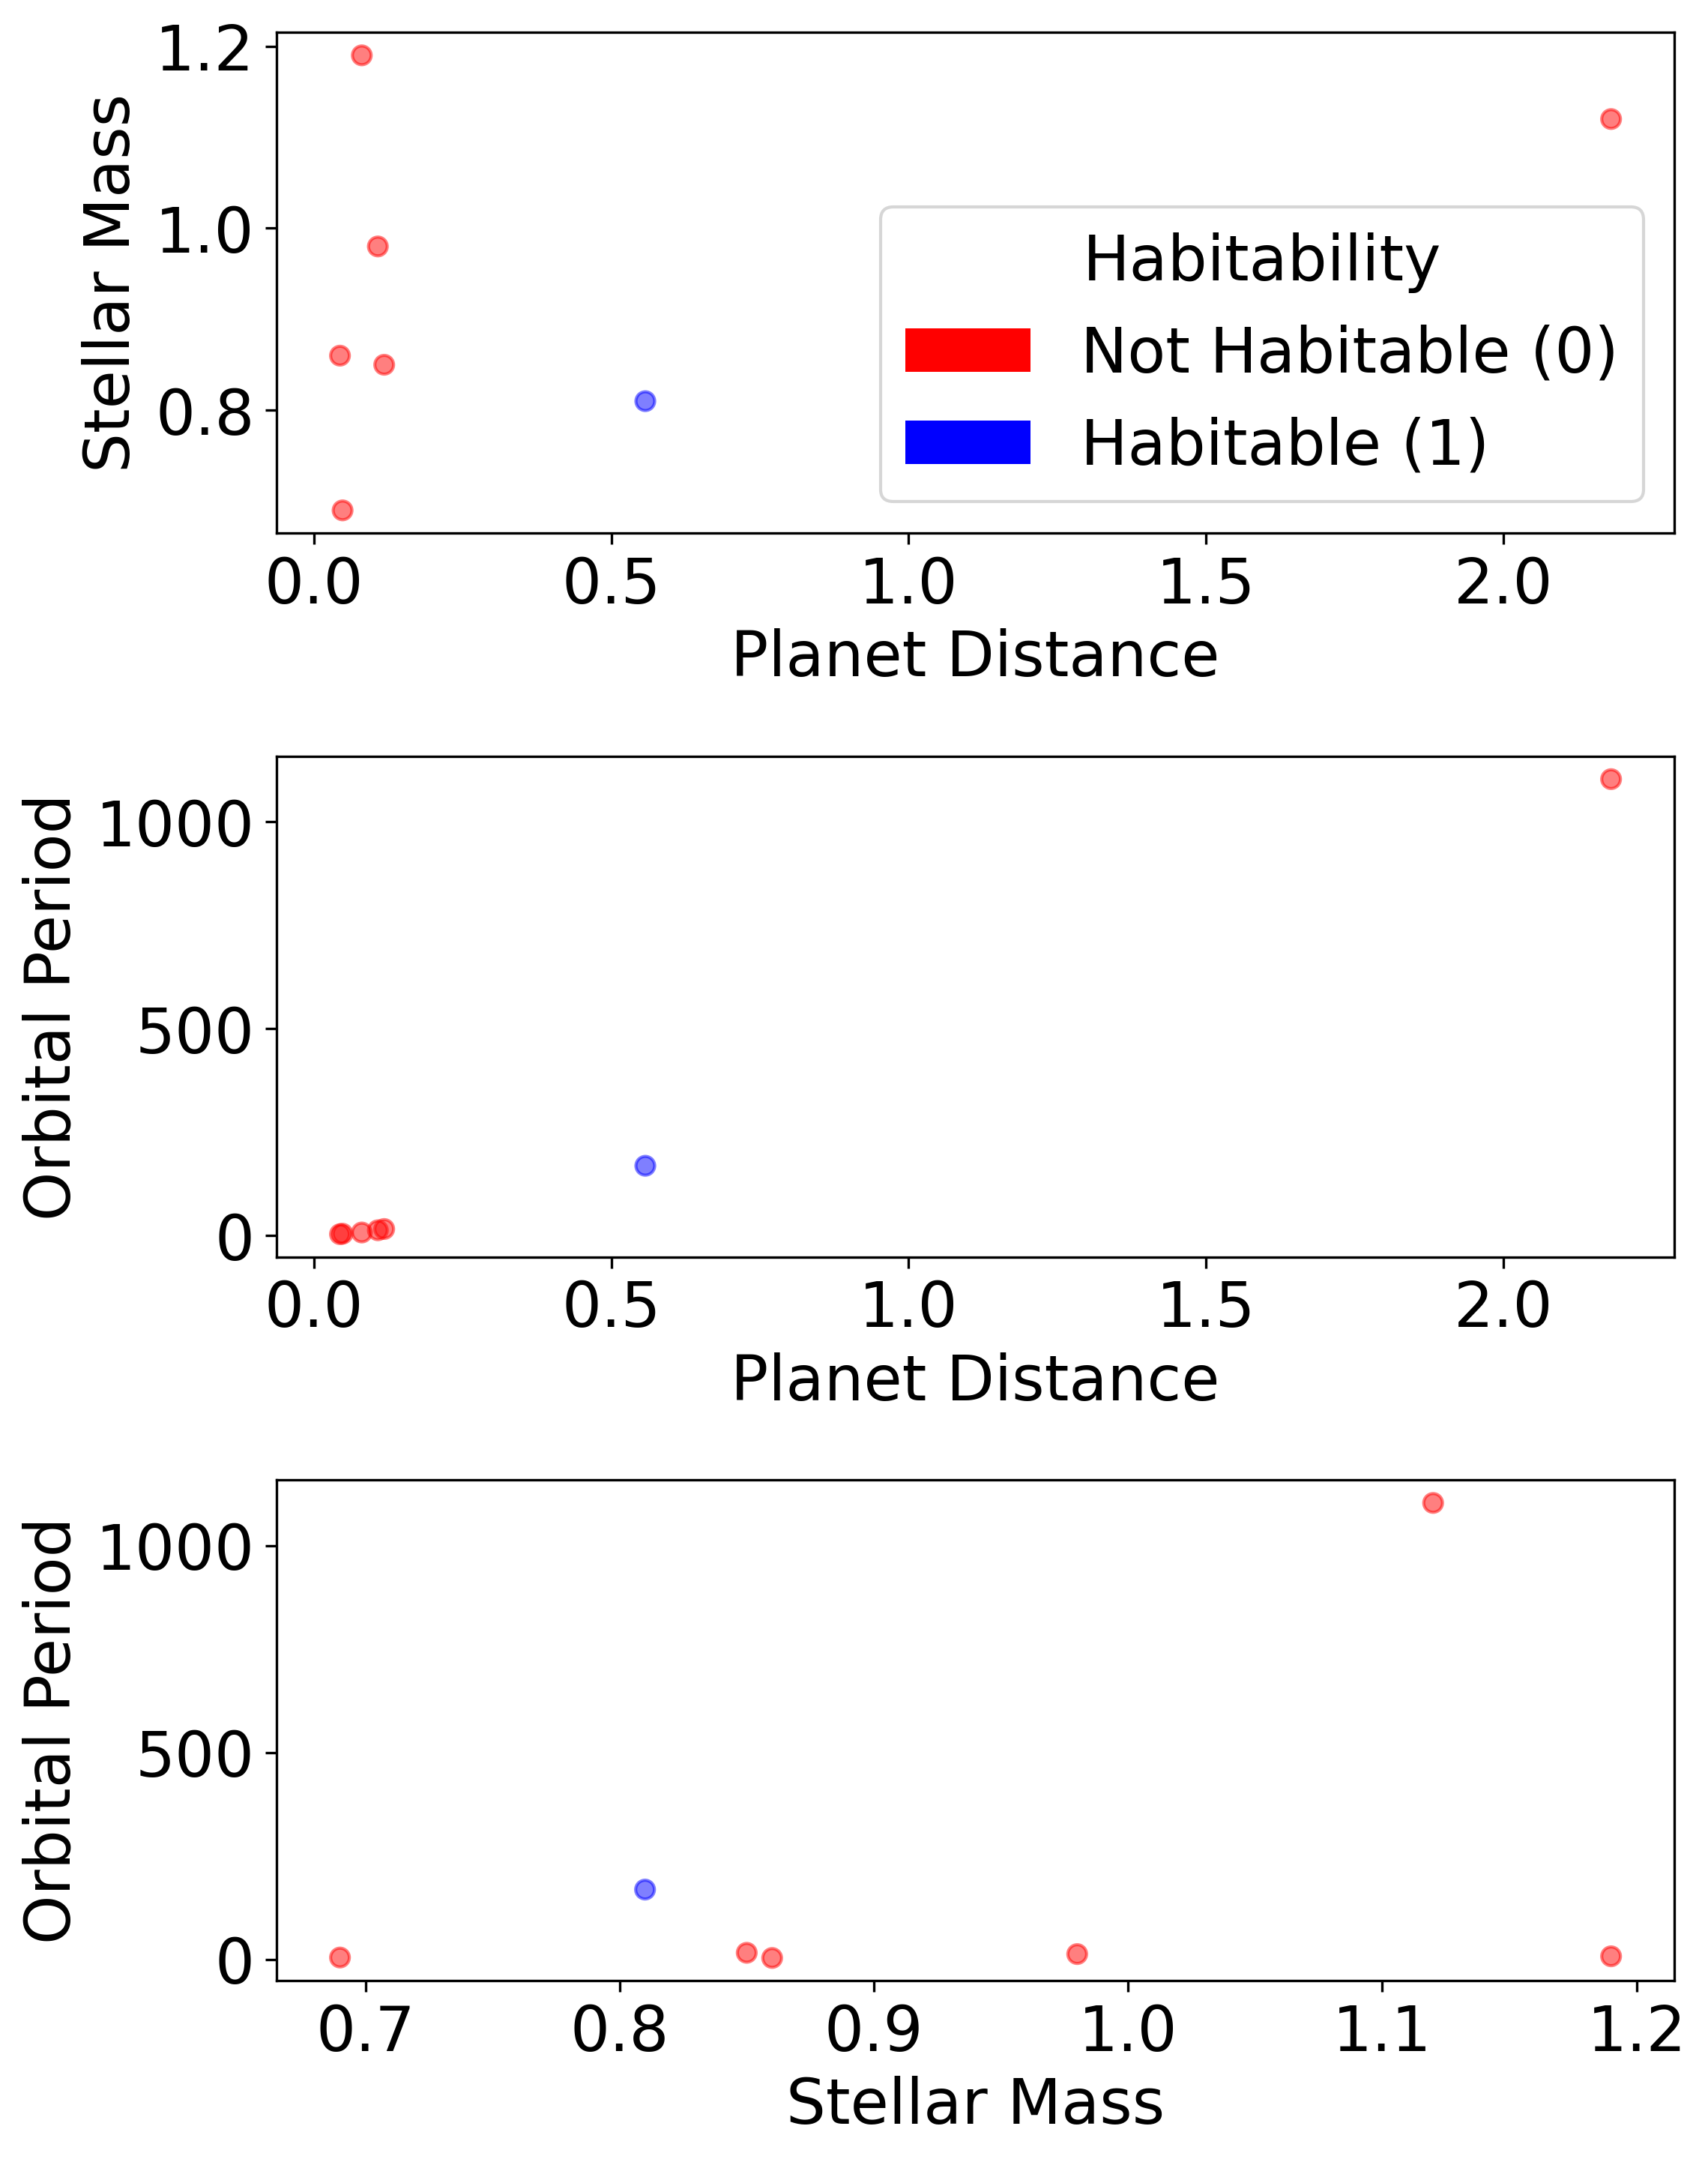

In [52]:
# Go back to the plotting cell above and turn it into a function that takes a data frame as an input, then execute it.
# Then use it to plot any subframes made by the first split that aren't leaf nodes yet.
plotData(subframe_left)
plotData(subframe_right)

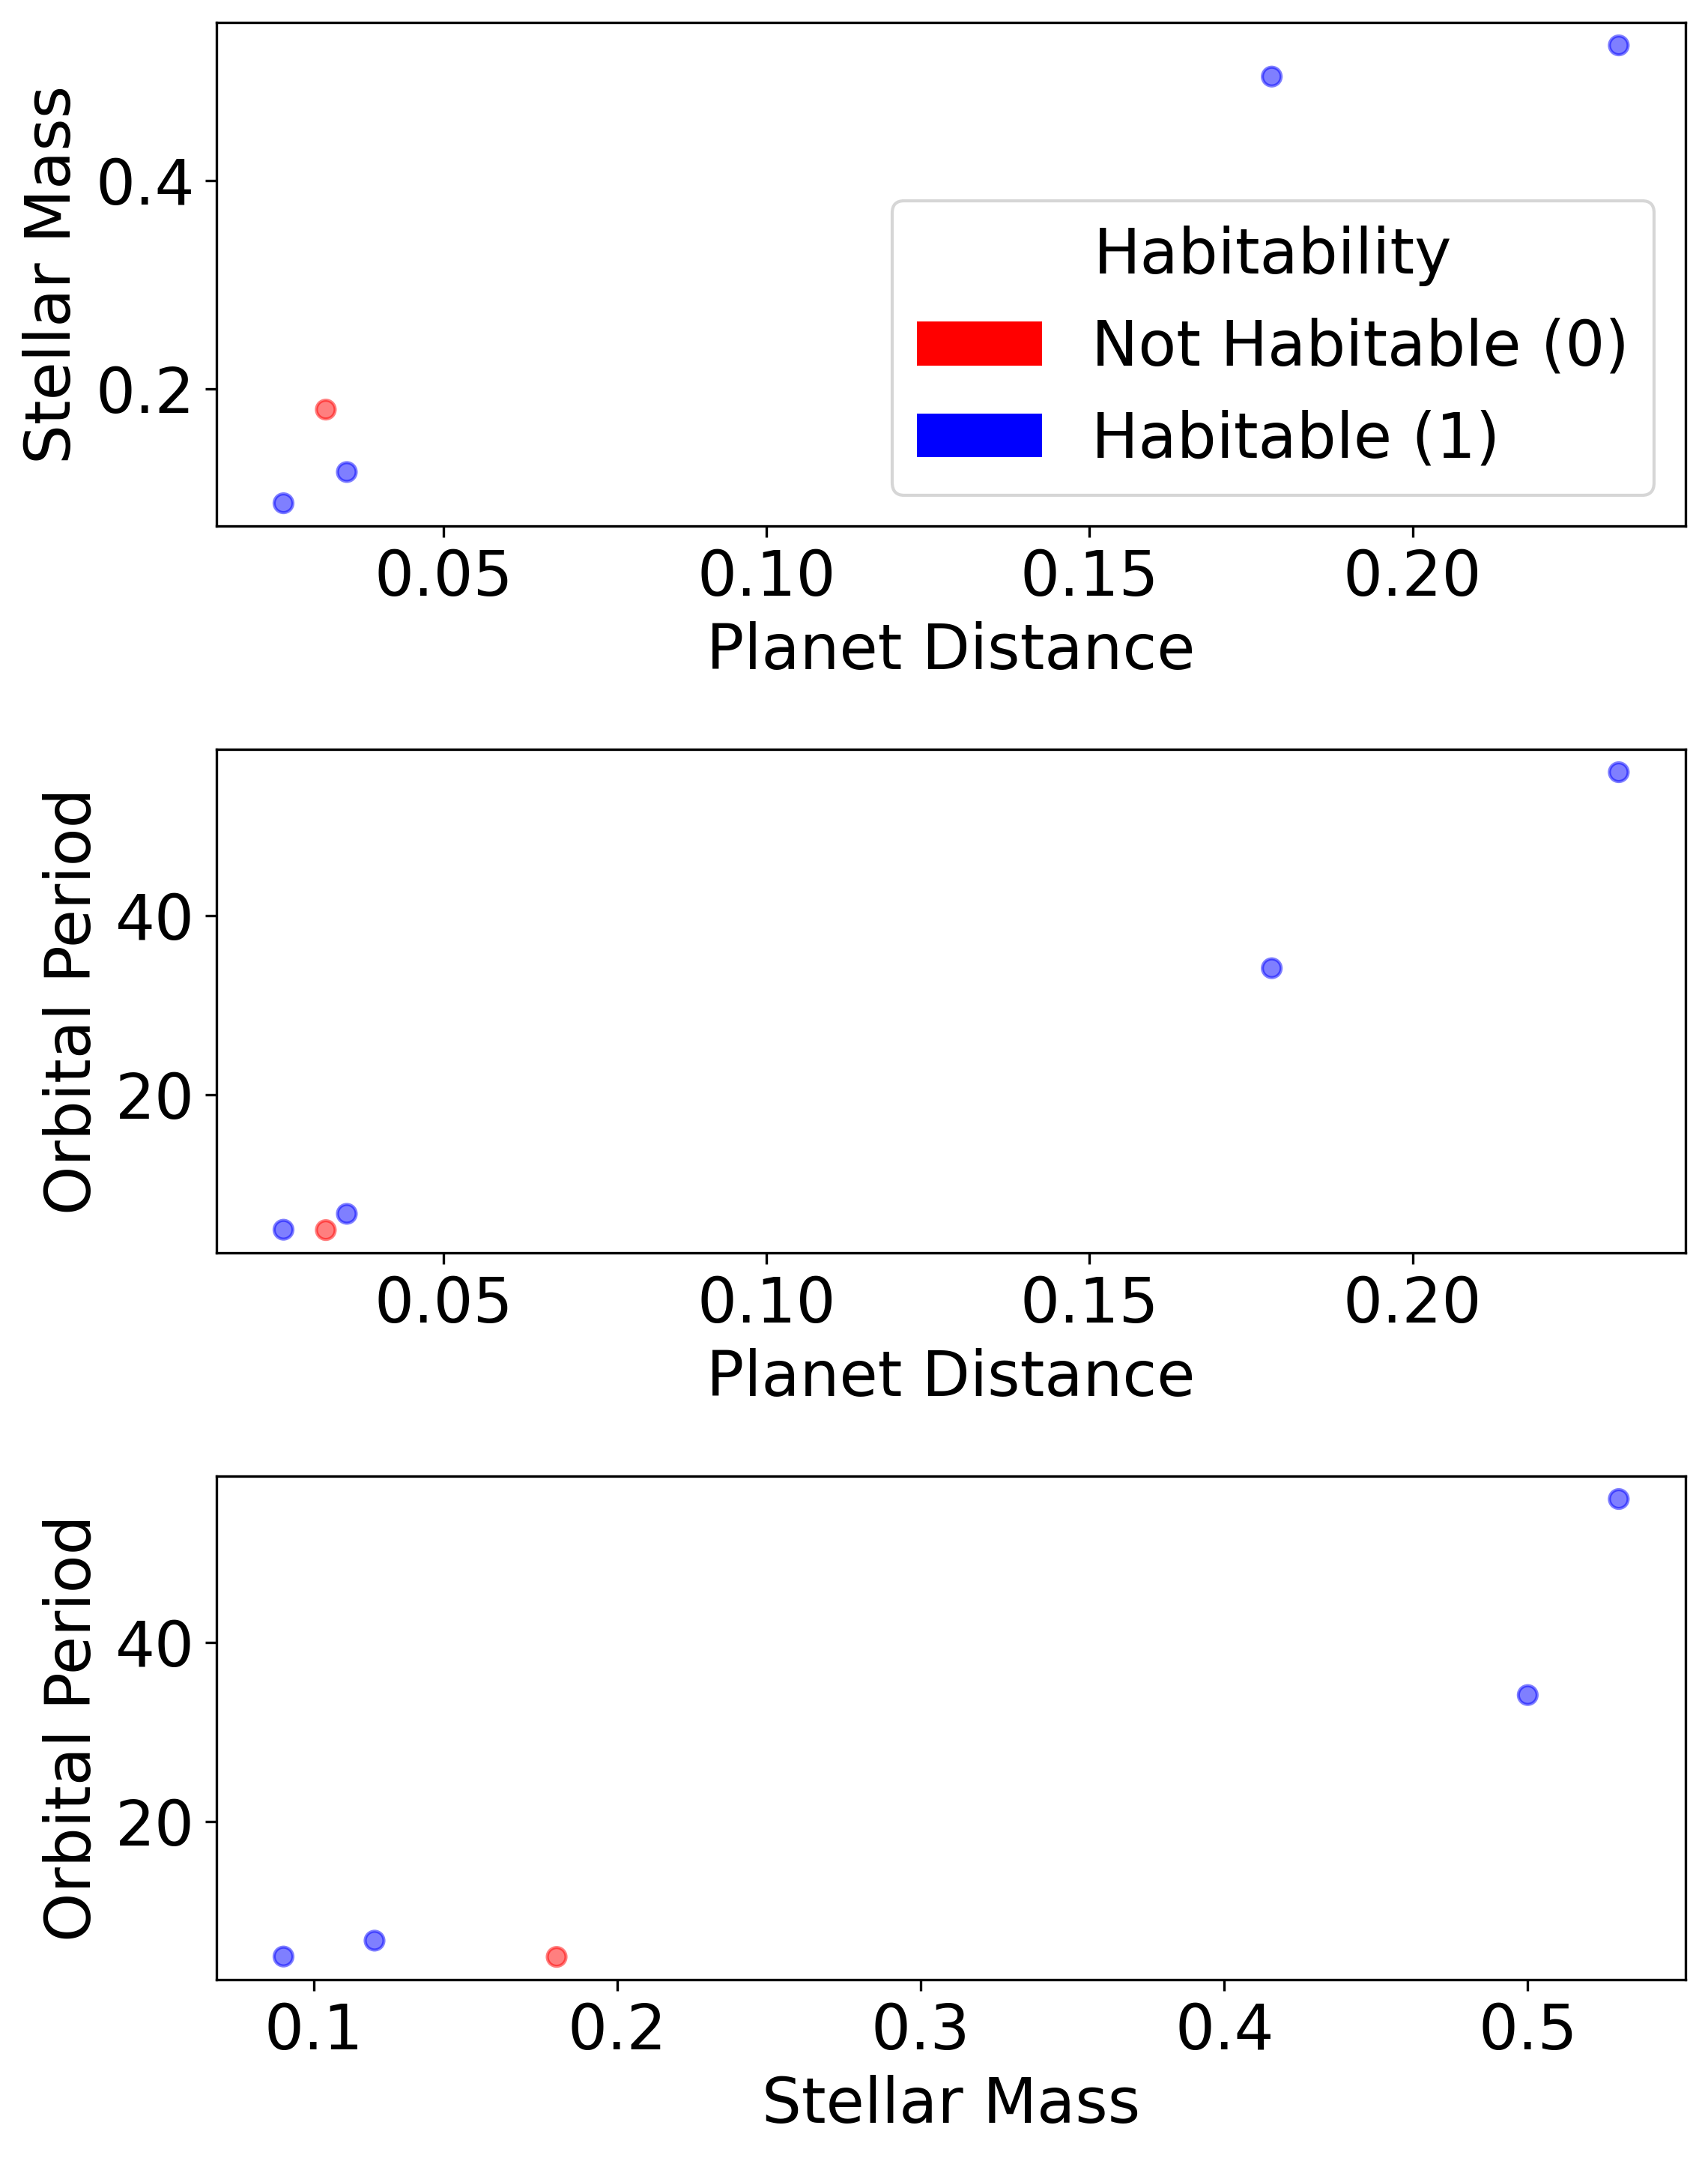

In [56]:
plotMyData(subframe_left)

With 1 more split, you should be able to make two pure nodes. Try to find what it is (you may need to zoom in on your plots to find it).

To evaluate your choice, you'll need to calculate the change in Gini impurity from the previous split.  Decision tree splits are applied in sequence, so the pure node from the previous split doesn't get split any further by this second split. The Gini impurity of that node is already 0, so there's no way to improve it futher. 

In [62]:
splitval =  4.89
cat = 'P_PERIOD'

subframe_left_smaller = subframe_left.query(f"`{cat}` < {splitval}") #Getting pandas to treat a string variable as a column name is a little tricky. You need to combine python's string formatting tools with pandas "query" function.
subframe_left_larger = subframe_left.query(f"`{cat}` > {splitval}")


print("Resulting nodes:")
print(f"Gini impurity of node with `{cat}` < {splitval} is {gini(subframe_left_smaller):.3f}")
print(f"Gini impurity of node with `{cat}` > {splitval} is {gini(subframe_left_larger):.3f}")


previous_gini = (len(subframe_left)/len(TrainSet))*(gini(subframe_left))- (len(subframe_right)/len(TrainSet))*(gini(subframe_right))
#fill in below with a calculation of the change in Gini impurity from the impurity of the previous step (given above)
#TODO
delta_gini =  previous_gini - gini(subframe_left)

print(f"Change in Gini impurity from this split is {delta_gini:.3f}")

Resulting nodes:
Gini impurity of node with `P_PERIOD` < 4.89 is 1.000
Gini impurity of node with `P_PERIOD` > 4.89 is 0.000
Change in Gini impurity from this split is -0.344


Once all Gini impurities have reached 0, there's no more we can do! Further splits won't improve it any more. Let's try applying our hand-made tree to the test data, and see how we would classify it.

### First, write the list of rules established by your hand-built decision tree as a series of "if...then..." statements:

### Try applying your decision tree "by hand" to the test set and see what happens. I'll do the first node for you.

In [73]:
TestSet

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
13,HD 104067 b,0.62,55.80600,0.260000,0
14,GJ 4276 b,0.41,13.35200,0.087613,0
15,Kepler-296 f,0.50,63.33627,0.268885,1
16,Kepler-63 b,0.98,9.43415,0.088100,0
17,GJ 3293 d,0.42,48.13450,0.195336,1


In [68]:
TestSet[(TestSet.S_MASS > 0.83)] #should all be not habitable

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
16,Kepler-63 b,0.98,9.43415,0.0881,0


### Your turn:
Fill in with a boolean selection to apply the other set of choices that should lead to a list of habitable planets, according to your decision tree. You can combine pandas selections with "&" for element-wise AND or "|" for element-wise OR. 

In [81]:
TestSet[(TestSet.S_MASS < 0.61) & (TestSet.P_PERIOD > 4.89)]

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
14,GJ 4276 b,0.41,13.35200,0.087613,0
15,Kepler-296 f,0.50,63.33627,0.268885,1
17,GJ 3293 d,0.42,48.13450,0.195336,1


### Question: How many of the 5 test data points is our hand-built network correct for?

>4

### We are now ready to fit the data with our decision tree!

Note: The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. 

To obtain a deterministic behaviour during fitting, random_state has to be fixed.


In [82]:
model = DecisionTreeClassifier(random_state = 3) #This is how we specify which method we'd like to use, and any parameters. 

model.fit(Xtrain, ytrain) #This tiny line is how we build models in sklearn.

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Finally, we can visualize the tree.

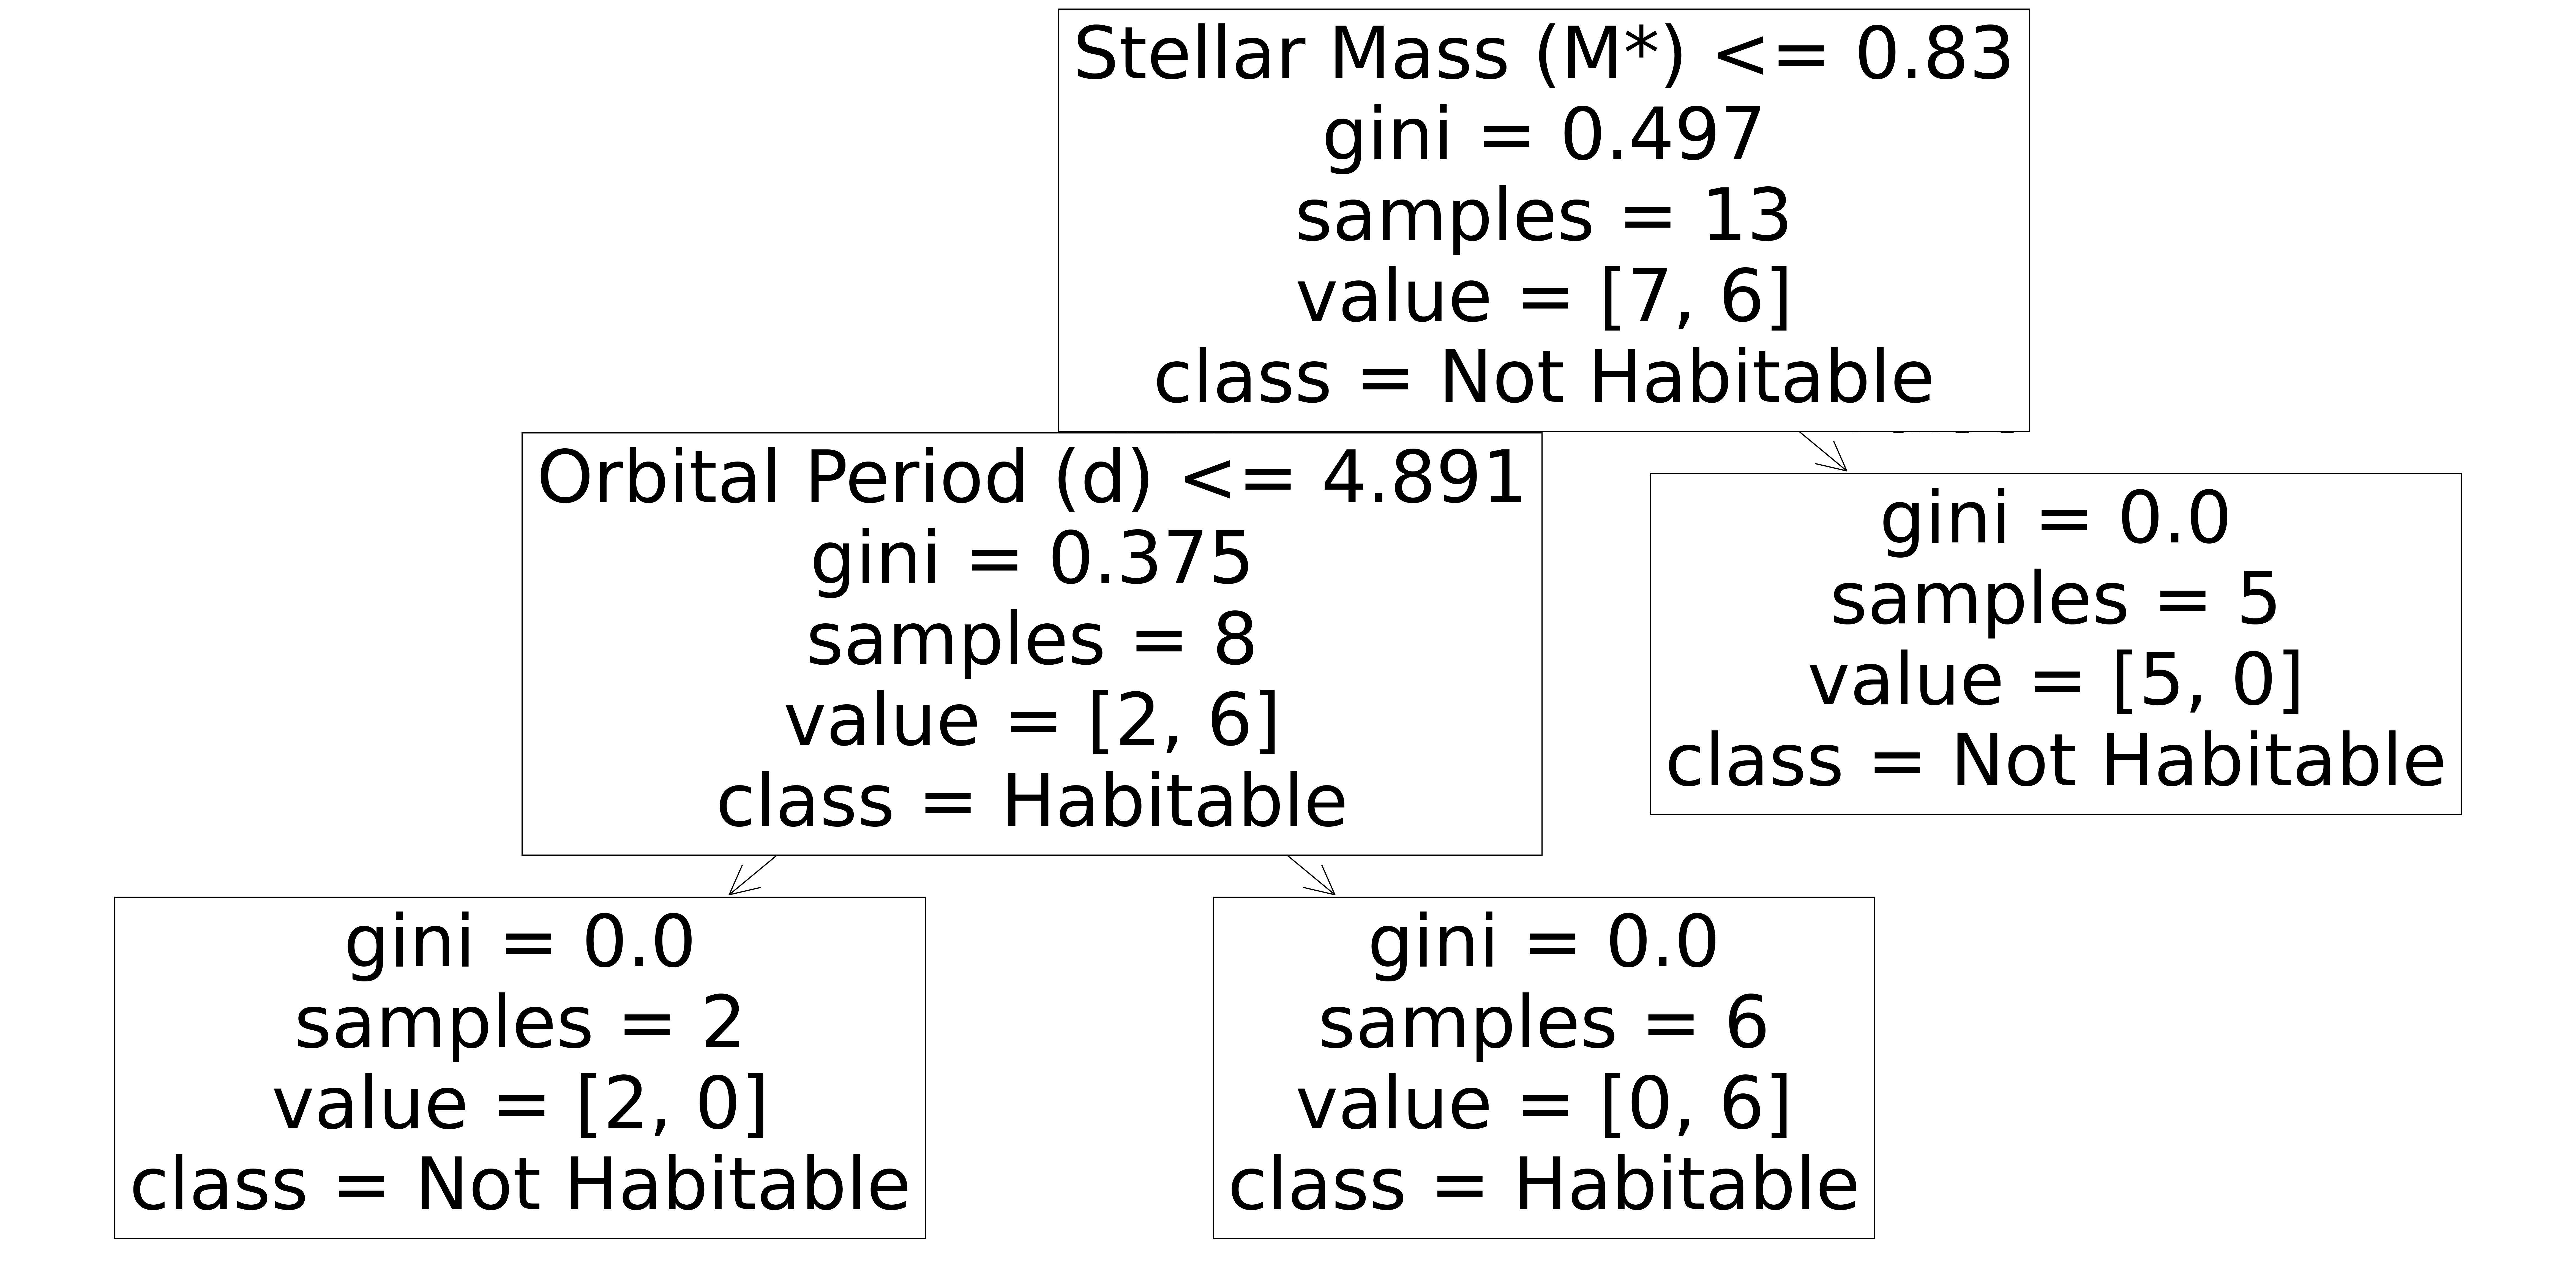

In [83]:
from sklearn import tree

plt.figure(figsize=(40,20))  # customize according to the size of your tree

tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])

plt.show()

We can make a fancier visualization using tools called GraphViz and PyDotPlus:

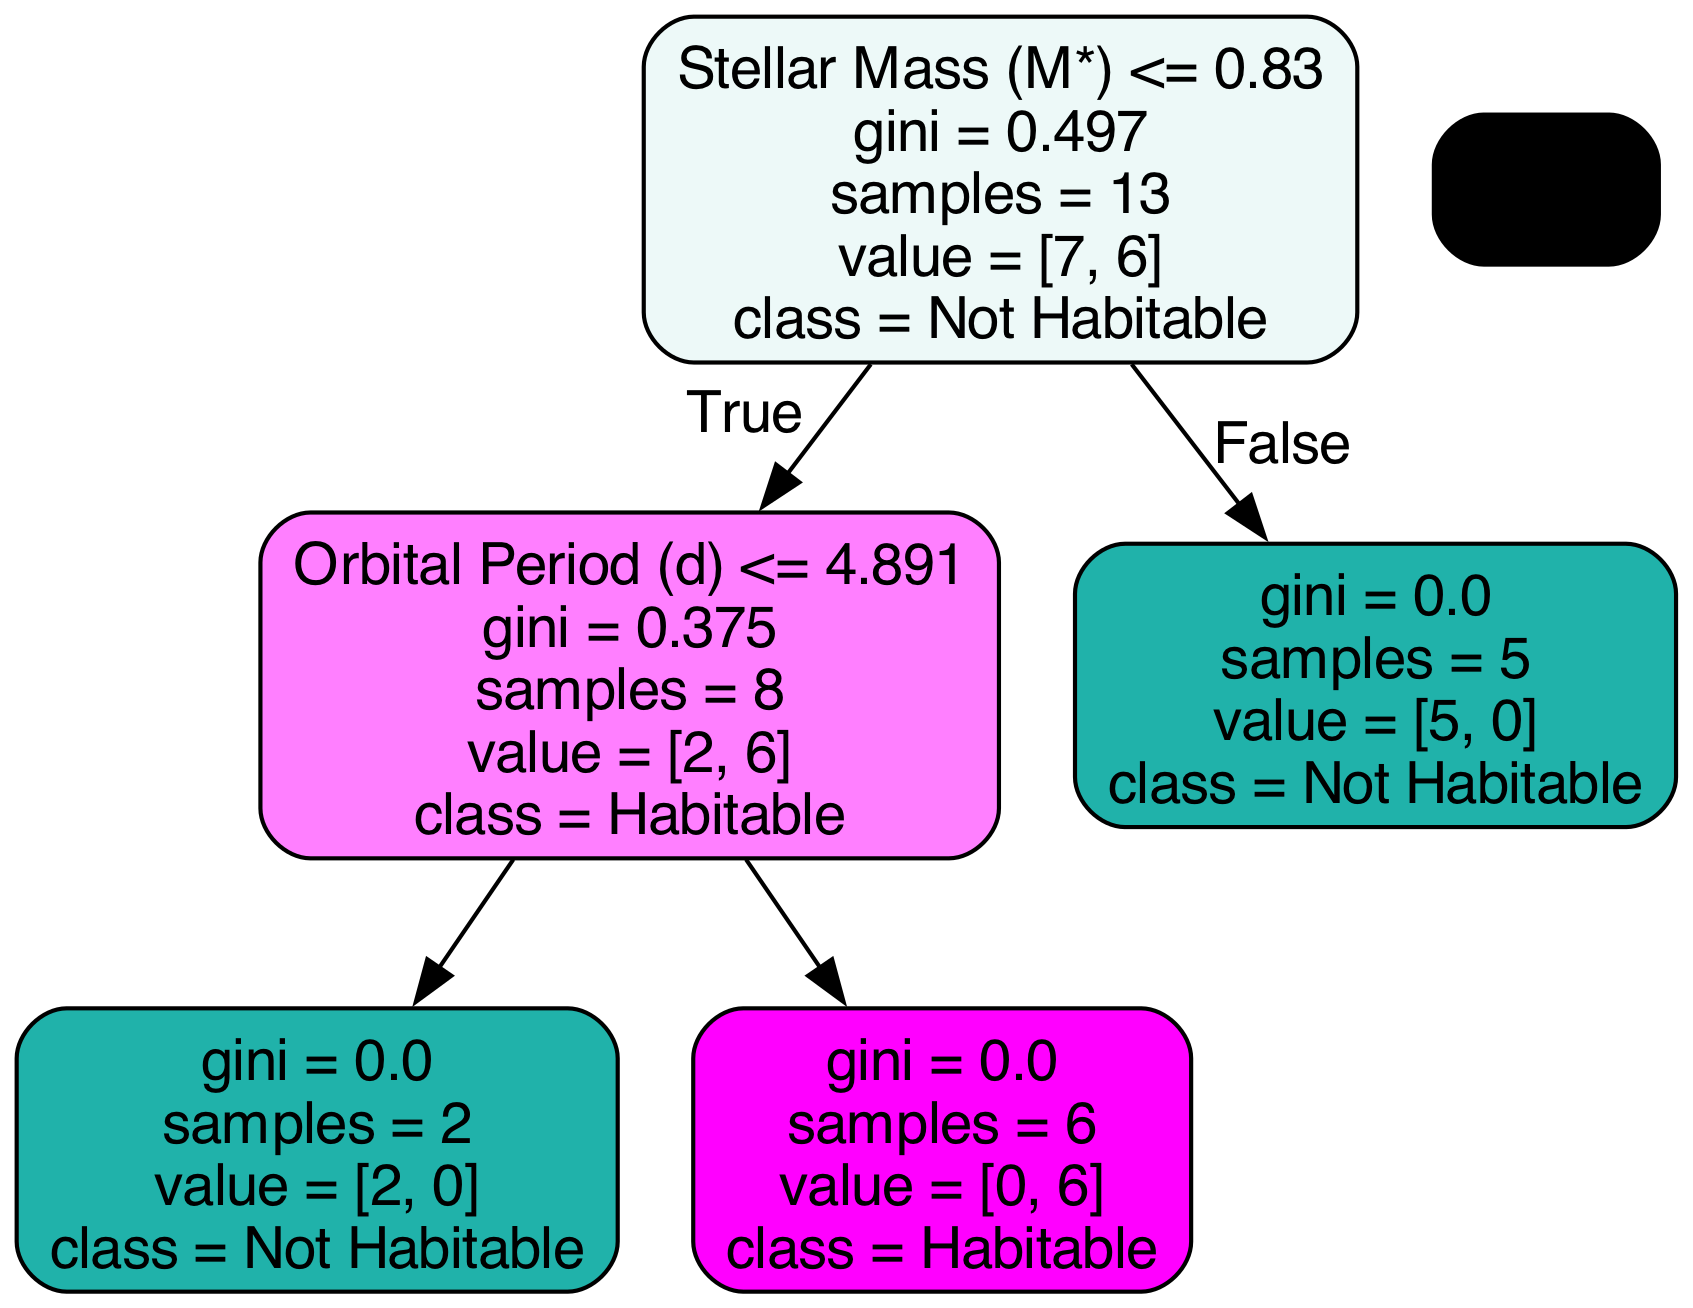

In [84]:
#GraphViz creates a text description of a graph using a special "grammar" format called DOT language that has keywords for objects like nodes. PyDotPlus is a python tool that knows how to interpret this format and plot the results.
dot_data = StringIO()
#Exports our decision tree to the DOT language. We pass it our trained model, a list of the features, and a list of the classes.
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names = ['Not Habitable','Habitable'],
            filled = True,
            rounded = True)
#Makes a graph from the DOT file we created
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#To make it look nice, we can color-code the nodes by their purity. Here we're using shades of green for nodes that contain mostly not-habitable planets, and purple for those with mostly habitable planets.
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]
        
        values = [int(255 * v / sum(values)) for v in values]
            
        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)


#Make the image of the graph
graph.set_dpi('300')
Image(graph.create_png())

#Image(graph.write_png('Graph.png')) #uncomment to write out to a .png file

### We can also visualize the decisions of the classifier. The shading indicates the predicted label, while the color of the markers indicates the true labe):

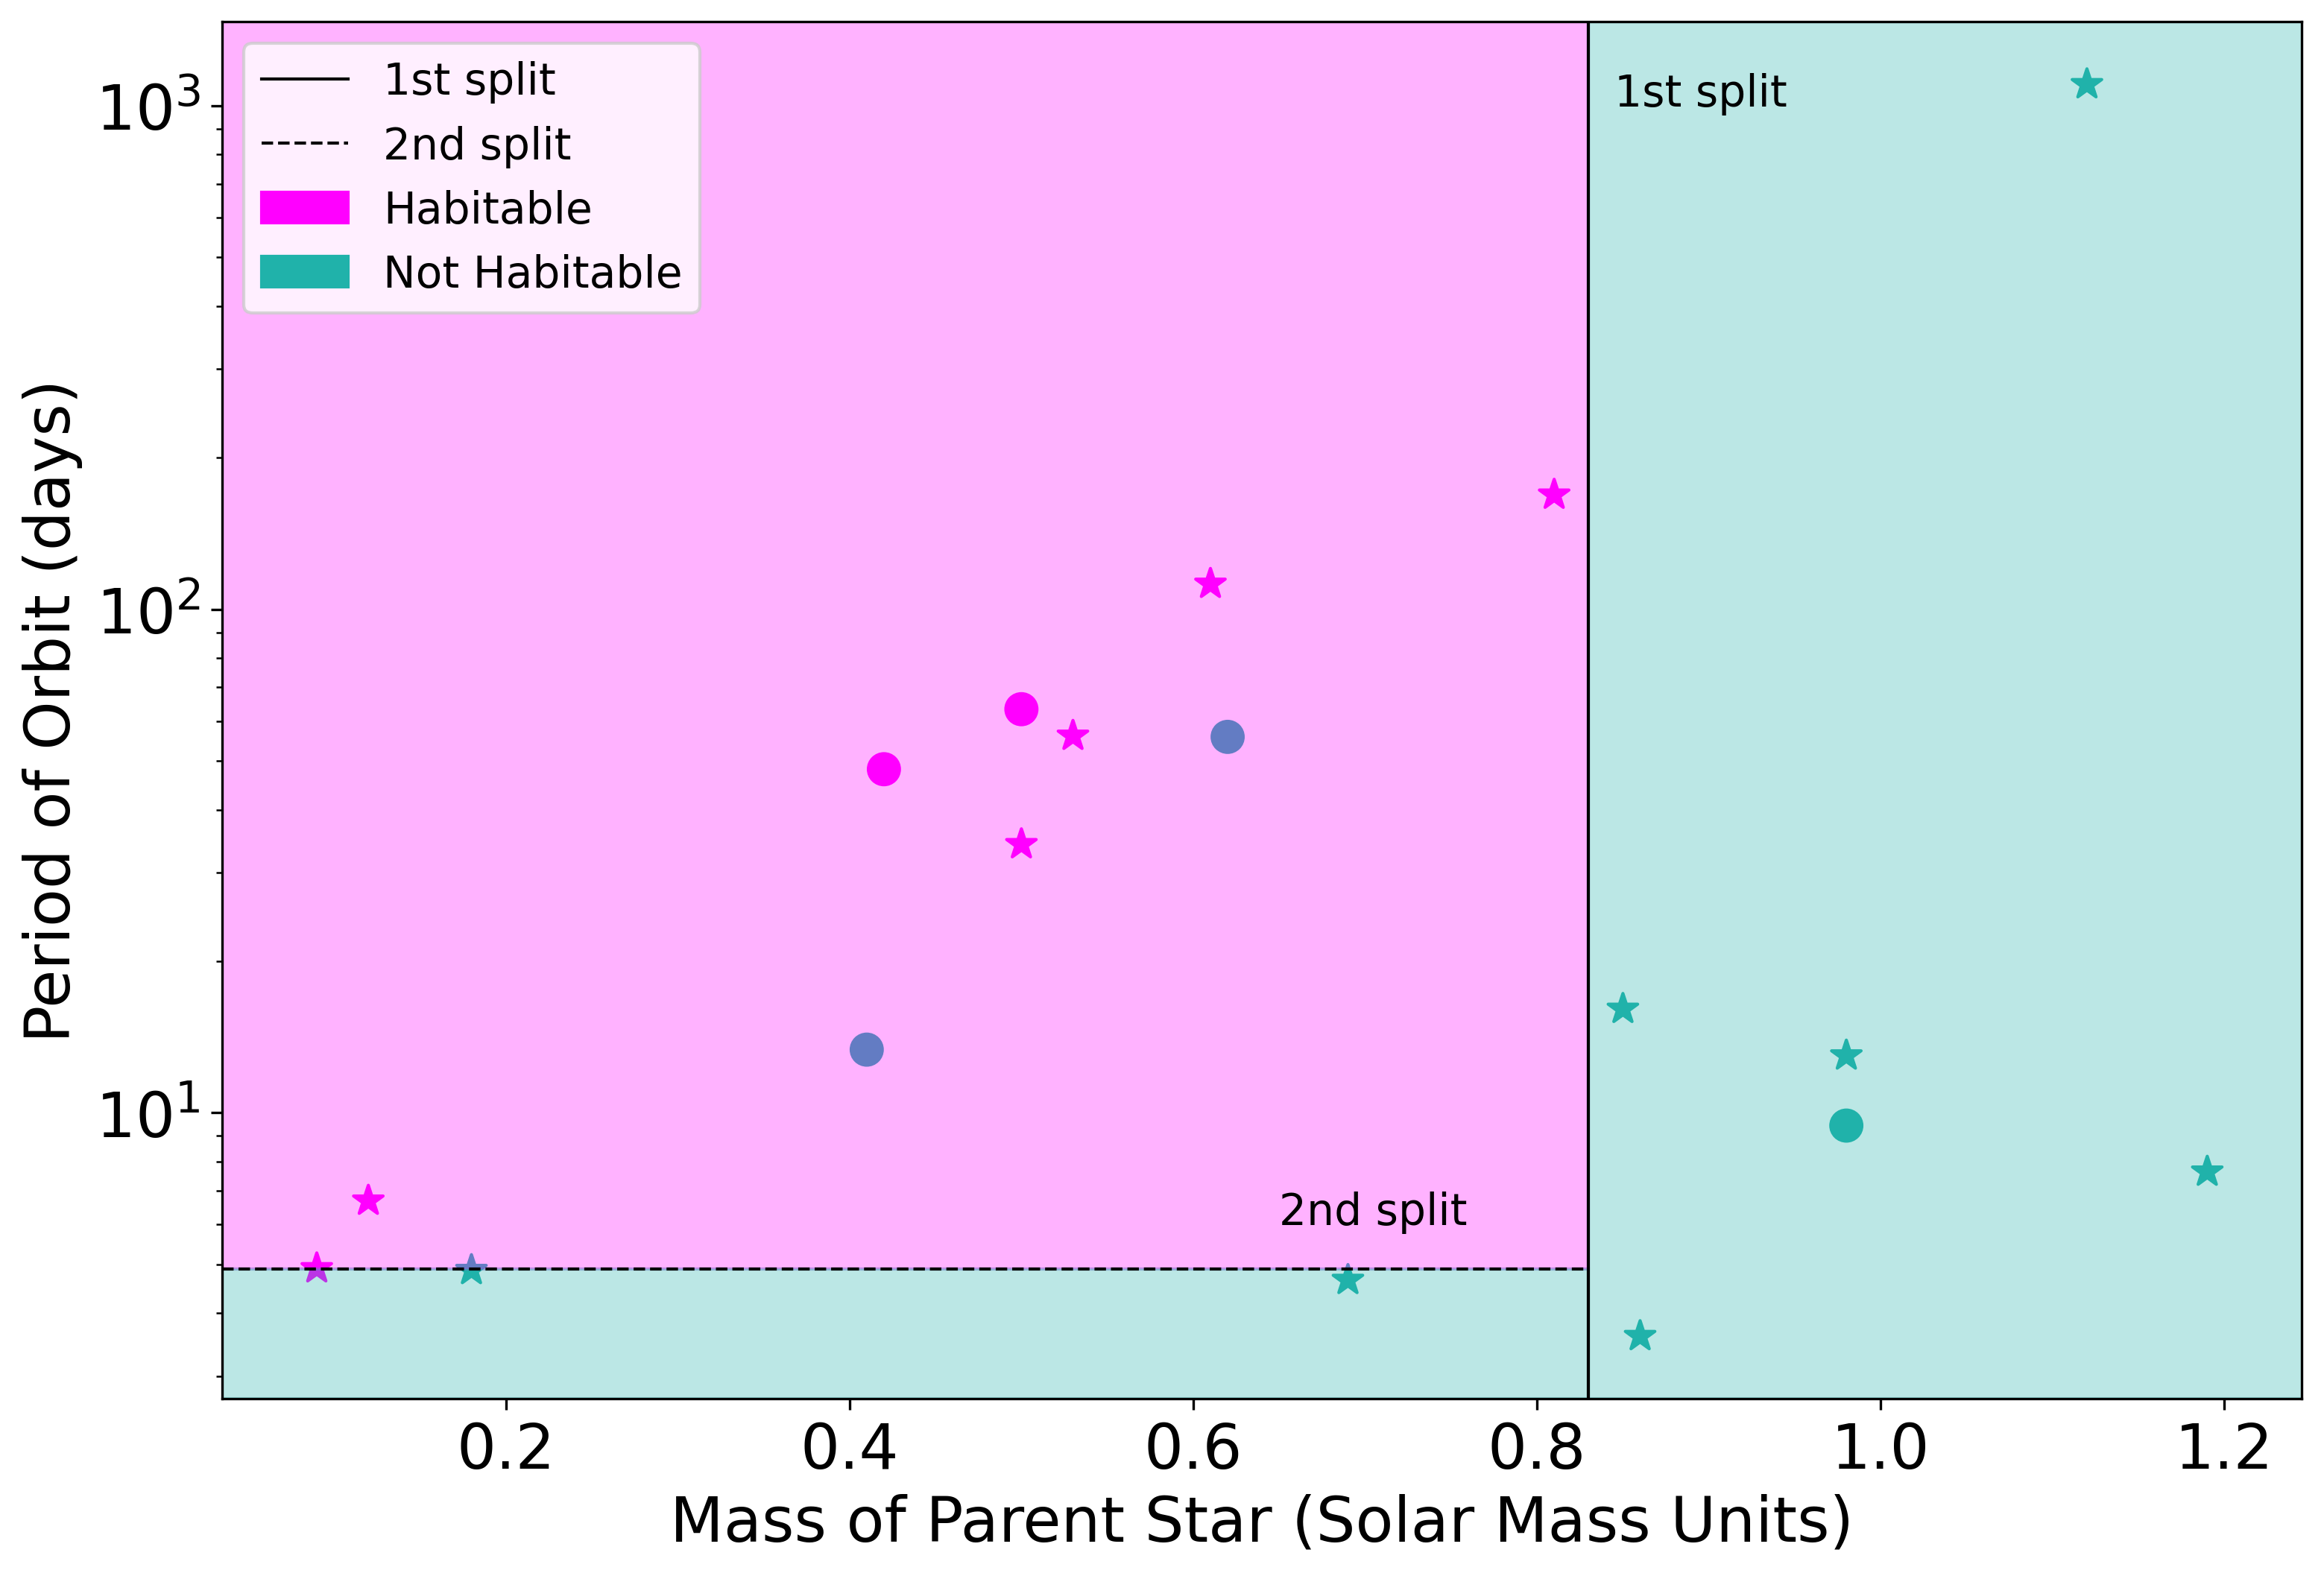

In [85]:
plt.figure(figsize=(12,8))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])

#Will now plot the train set and test set points

plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',\
            c = TrainSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Train')

plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',\
            c = TestSet['P_HABITABLE'], s = 100, cmap=cmap, label = 'Test')

plt.yscale('log')

plt.xlabel('Mass of Parent Star (Solar Mass Units)')

plt.ylabel('Period of Orbit (days)');

#I can add the splits to the plot

plt.axvline(x=0.83, linewidth =1, ls = '-', label = '1st split', c='k')

plt.axhline(y=4.891, xmin = 0, xmax = 0.655, linewidth =1, ls = '--', label = '2nd split',c='k')

plt.text(0.845, 10**3, '1st split', fontsize=14)
         
plt.text(0.65, 6, '2nd split', fontsize=14)

#Add legend, including unlabeled objects

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')

magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()

predhab = mpatches.Rectangle((0,4.891),0.83,ax.get_ylim()[1], 
                        fill = True,
                        color = '#FF00FF',
                        alpha = 0.3)

prednothab1 = mpatches.Rectangle((0.83,ax.get_ylim()[0]),ax.get_xlim()[1],ax.get_ylim()[1], 
                        fill = True,
                        color = '#20B2AA',
                        alpha = 0.3)

prednothab2 = mpatches.Rectangle((0,ax.get_ylim()[0]),0.83,4.891-ax.get_ylim()[0], 
                        fill = True,
                        color = '#20B2AA',
                        alpha = 0.3)

leg = ax.get_legend()
leg.legend_handles[2].set_color('k')
leg.legend_handles[3].set_color('k')

plt.gca().add_patch(predhab)
plt.gca().add_patch(prednothab1)
plt.gca().add_patch(prednothab2)

leg = ax.get_legend()
leg.legend_handles[2].set_color('k')
leg.legend_handles[3].set_color('k')


plt.legend(handles=[leg.legend_handles[2],leg.legend_handles[3], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14);


### Questions: 
    
1. What is the accuracy (percentage of correct classifications) on the training set? 


2.  How about on the test set (run the test set through the tree manually, or look at the figure above)? 

>1. 100%
> 
>2. 60%

### We want, of course, to be able to answer the questions in code as well.


In [86]:
ypred = model.predict(Xtest) #how to generate predicted labels on test set

In [87]:
metrics.accuracy_score(ytest, ypred) #test score -- the accuracy_score method compares the true labels with the predicted labels

0.6

Check the train score using code:

In [91]:
#check train score in code
#TODO
xpred = model.predict(ytest)
metrics.accuracy_score(ytrain, xpred)

/opt/anaconda3/envs/PHYS448/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### Our final exercise with the DT method will consist of picking a different train/test split.

### Your turn: select the first 5 objects for an alternate test set, and all the other objects for the training set

In [ ]:
TrainSet2 = LearningSet.iloc[# your code here

TestSet2 = LearningSet.iloc[# your code here

### Go through the motion again...

In [ ]:
Xtrain2 = #drop anything that isn't a feature from TrainSet2

Xtest2 = #drop anything that isn't a feature from TestSet2

ytrain2 = #select labels from TrainSet2

ytest2 = #select labels from TestSet2

model2 = DecisionTreeClassifier(random_state=3) # make a new DecisionTreeClassifier object

# Write a line of code below to train your new model with the new training set


### We can now visualize the new tree:

In [ ]:
dot_data = StringIO()
export_graphviz(
            model2,
            out_file =  dot_data,
            feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'],
            class_names = ['Not Habitable','Habitable'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        values = [255 * v / sum(values) for v in values]
        
        values = [int(255 * v / sum(values)) for v in values]
            
        if values[0] > values[1]:
            alpha = int(values[0] - values[1])
            alpha = '{:02x}'.format(alpha) #turn into hexadecimal
            color = '#20 B2 AA'+str(alpha)
        else:
            alpha = int(values[1] - values[0])
            alpha = '{:02x}'.format(alpha)
            color = '#FF 00 FF'+str(alpha)
        node.set_fillcolor(color)

graph.set_dpi('300')

Image(graph.create_png())

#Image(graph.write_png('Graph.png'))

### As you can see, this is quite different from the one we had before!

### Questions: 
    
1. What is the accuracy (percentage of correct classifications) on the training set? 


2. How about on the test set? Don't do it by hand, it's faster to use a line of code!


In [ ]:
# Code cell to find the answers

### Let's consider some advantages and disadvantages of the decision tree method.
1. What are some strengths of the Decision Tree algorithm? 
2. What are some limitations of the DT algorithm?
3. What are some concerns we should have with this particular example of applying the DT algorithm?

Try adding some new data points: Earth, Mars, and Venus (look up any values you don't know, NASA is a good source). Then run them though each of the two models trained above to see what they'd predict. Are our models accurate?

In [ ]:
# To match the structure used above, we'll make a pandas dataframe for the new data
LocalSystemSet = pd.DataFrame({
    'P_NAME': ['Venus', 'Earth', 'Mars' ], 
    'S_MASS': [], #fill in with correct values (units = M_solar)
    'P_PERIOD': [], #fill in with correct values (units = days)
    'P_DISTANCE': [], #fill in with correct values (units = AU, use the semi-major axis)
    'P_HABITABLE': [0, 1, 1] #I'll give you the answers here, though Mars is debatable! We'll talk about adding more nuance to these categories next time

})

Using the same approach as above, drop the planet name and label columns to create a test set of local planets (your x values), and select just the label values to create a prediction target you can use to check the model accuracy (your y values):

In [ ]:
XtestLocal = #your code here

ytestLocal = #your code here

Run the "predict" and "accuracy score" methods on each of the 2 models trained above to see how they perform on our test set of local planets.

In [ ]:
#Your code here

What do your decision tree models predict for Venus, Earth, and Mars?

### Acknowledgement statement: every assignment you submit will include an acknowledgement statement crediting the resources (human or otherwise) that you relied on for your work. In this case, your group mates are all already credited, but if you used any other resources, credit them here.

### That's it for Decision Trees, for now! Upload your completed notebook to Gradescope to submit it, and move on the kNN notebook.